In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
iterations_data = pd.read_csv('iterations_timings.csv')
size_data = pd.read_csv('size_timings.csv')

# Format size_data
size_data['size'] = size_data['nmax']**2
size_data.drop(columns = 'nmax', inplace = True)
size_data = np.log(size_data)
size_data.set_index('size', inplace = True)
               
# Format iterations data
iterations_data['iterations'] = iterations_data['nmax']
iterations_data.drop(columns = 'nmax', inplace = True)
iterations_data['iterations'] = np.log(iterations_data['iterations'])
iterations_data.set_index('iterations', inplace = True)

iterations_time = np.log(iterations_data.iloc[:,:6])
iterations_order = iterations_data.iloc[:,6:]

iterations_order

,unedited_order,vectorized_order,numba_order,cython_order,vectorized_cython_order,vectorized_numba_order
iterations,,,,,,
2.302585,0.280,0.276,0.317,0.265,0.320,0.287
3.218876,0.286,0.302,0.378,0.288,0.379,0.314
3.912023,0.358,0.295,0.409,0.316,0.368,0.314
4.317488,0.402,0.338,0.261,0.338,0.329,0.385
4.605170,0.314,0.323,0.350,0.328,0.439,0.421
5.010635,0.475,0.405,0.369,0.430,0.398,0.384
5.298317,0.571,0.329,0.594,0.344,0.514,0.496
5.521461,0.597,0.293,0.518,0.458,0.306,0.503


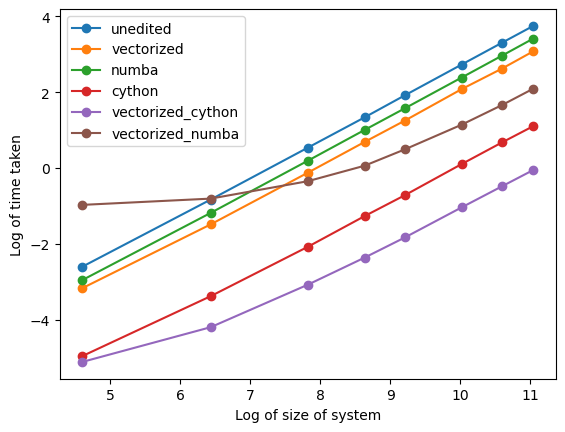

In [96]:
fig, ax = plt.subplots()

ax.plot(size_data, marker = 'o')

ax.set_xlabel('Log of size of system')
ax.set_ylabel('Log of time taken')

plt.legend(size_data.columns)

plt.show()

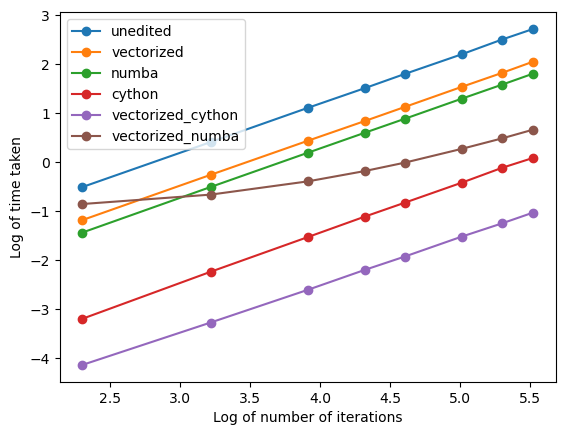

In [90]:
fig, ax = plt.subplots()

ax.plot(iterations_time, marker = 'o')

ax.set_xlabel('Log of number of iterations')
ax.set_ylabel('Log of time taken')

plt.legend(size_data.columns)

plt.show()

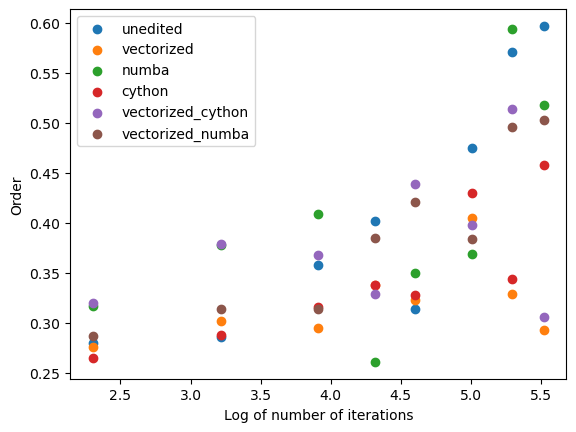

In [95]:
fig, ax = plt.subplots()

for column in iterations_order.columns:    
    ax.scatter(iterations_order.index, iterations_order[column])

ax.set_xlabel('Log of number of iterations')
ax.set_ylabel('Order')

plt.legend(size_data.columns)

plt.show()